# Exploratory Data Analysis in Python

### What is Exploratory Data Analysis (EDA) ?
EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like:

1. Main features of data
2. Variables and relationships that hold between them
3. Identifying which variables are important for our problem

##### We shall look at various exploratory data analysis methods like:

1. Descriptive Statistics, which is a way of giving a brief overview of the dataset we are dealing with, including some measures and features of the sample
2. Grouping data Basic grouping with group by
3. ANOVA, Analysis Of Variance, which is a computational method to divide variations in an observations set into different components.
4. Correlation and correlation methods

The dataset we’ll be using is chile voting dataset, which you can import in python as:

In [1]:
import pandas as pd 
data = pd.read_csv("Data/Chile.csv")
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 9 columns):
Unnamed: 0    2700 non-null int64
region        2700 non-null object
population    2700 non-null int64
sex           2700 non-null object
age           2699 non-null float64
education     2689 non-null object
income        2602 non-null float64
statusquo     2683 non-null float64
vote          2532 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 189.9+ KB


**Descriptive Statistics**

---
Descriptive statistics is a helpful way to understand characteristics of your data and to get a quick summary of it. Pandas in python provide an interesting method describe(). The describe function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture of distribution of data.




In [2]:
df.describe()

,Unnamed: 0,population,age,income,statusquo
count,2700.000000,2700.000000,2699.000000,2602.000000,2.683000e+03
mean,1350.500000,152222.222222,38.548722,33875.864719,-1.118151e-08
std,779.567188,102198.039602,14.756415,39502.867120,1.000186e+00
min,1.000000,3750.000000,18.000000,2500.000000,-1.803010e+00
25%,675.750000,25000.000000,26.000000,7500.000000,-1.002235e+00
50%,1350.500000,175000.000000,36.000000,15000.000000,-4.558000e-02
75%,2025.250000,250000.000000,49.000000,35000.000000,9.685750e-01
max,2700.000000,250000.000000,70.000000,200000.000000,2.048590e+00


Another useful method if value_counts() which can get count of each category in a categorical attributed series of values. For an instance suppose you are dealing with a dataset of customers who are divided as youth, medium and old categories under column name age and your dataframe is “DF”. You can run this statement to know how many people fall in respective categories. In our data set example education column can be used

In [5]:
df["population"].value_counts() 

250000    1300
25000      360
15000      300
125000     240
175000     140
45000      120
87500       80
62500       80
8750        60
3750        20
Name: population, dtype: int64

One more useful tool is boxplot which you can use through matplotlib module. Boxplot is a pictorial representation of distribution of data which shows extreme values, median and quartiles. We can easily figure out outliers by using boxplots. Now consider the dataset we’ve been dealing with again and lets draw a boxplot on attribute population

### Grouping data

Group by is an interesting measure available in pandas which can help us figure out effect of different categorical attributes on other data variables. Let’s see an example on the same dataset where we want to figure out affect of people’s age and education on the voting dataset.

In [8]:
x = df.groupby(['population', 'vote']).mean()
print(x)

                  Unnamed: 0        age        income  statusquo
population vote                                                 
3750       N      206.714286  39.142857  32142.857143  -0.532890
           U      203.000000  61.000000  15000.000000   1.444010
           Y      213.333333  39.166667  12083.333333   0.848857
8750       A      908.000000  30.500000  38750.000000  -0.498835
           N      800.200000  35.900000  25000.000000  -0.604011
           U      908.666667  44.533333  21166.666667   0.193187
           Y      998.733333  38.833333  25583.333333   1.254311
15000      A      693.222222  34.055556  25882.352941  -0.287576
           N     1056.267606  34.422535  19637.681159  -0.763970
           U     1108.228916  40.963855  19900.000000   0.232382
           Y     1219.019231  41.009615  23137.254902   1.047995
25000      A     1220.269231  34.307692  31600.000000   0.046688
           N     1136.750000  33.965909  23110.465116  -0.811421
           U     1229.241

If this group by output table is less understandable further analysts use pivot tables and heat maps for visualization on them.

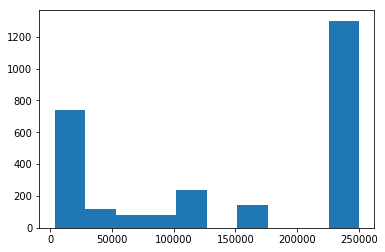

In [10]:
import matplotlib.pyplot as plt
y = list(df.population) 
plt.hist(y) 
plt.show()

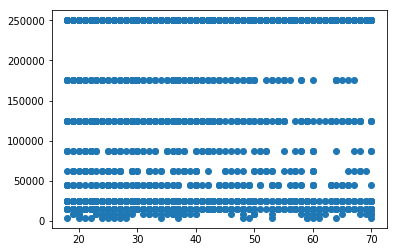

In [13]:
plt.scatter(x,y)
plt.show()

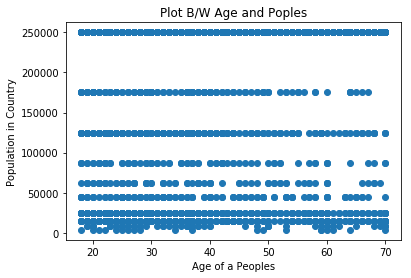

In [14]:
import matplotlib.pyplot as plt
x = list(df.age)
y = list(df.population) 
plt.scatter(x,y) 
plt.xlabel("Age of a Peoples")
plt.ylabel("Population in Country")
plt.title("Plot B/W Age and Poples")
plt.show()

### **ANOVA**

---

ANOVA stands for Analysis of Variance. 

1. It is performed to figure out the relation between the different group of categorical data.
2. Under ANOVA we have two measures as result:
      1.  F-testscore : which shows the variaton of groups mean over variation
      2.  P-value: it shows the importance of the result

This can be performed using python module scipy method name f_oneway()


**Syntax:**


import scipy.stats as st

st.f_oneway(sample1, sample2, ..)


These samples are sample measurements for each group.

1. we can say that there is a strong correlation between other variables and a categorical variable if the ANOVA test gives us a large F-test value and a small p-value.

**Correlation and Correlation computation**


---

Correlation is a simple relationship between two variables in a context such that one variable affects the other. Correlation is different from act of causing. One way to calculate correlation among variables is to find Pearson correlation. Here we find two parameters namely, Pearson coefficient and p-value. We can say there is a strong correlation between two variables when Pearson correlation coefficient is close to either 1 or -1 and the p-value is less than 0.0001.

Scipy module also provides a method to perform pearson correlation analysis, syntax:

import scipy.stats as st

st.pearsonr(sample1, sample2)

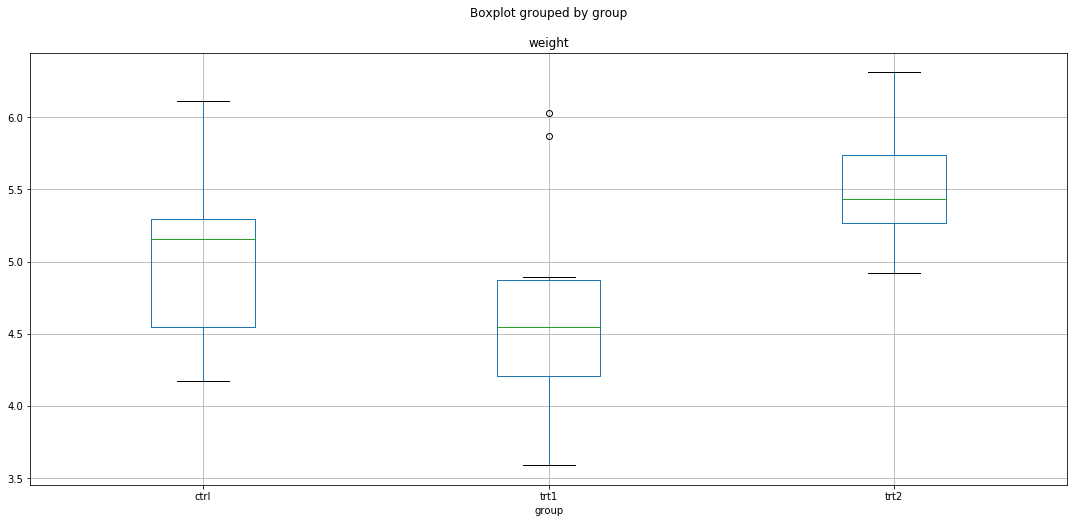

In [15]:
import pandas as pd
datafile = "Data/PlantGrowth.csv"
data = pd.read_csv(datafile)
 
#Create a boxplot
data.boxplot('weight', by='group', figsize=(18, 8))
 
ctrl = data['weight'][data.group == 'ctrl']
 
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}
 
k = len(pd.unique(data.group))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('group').size()[0] #Participants in each condition